# Tabla de Contenido 

<a id='tabla'></a>

* [Introducción](#intro)
* [1. Preparación de Datos](#as1)
* [2. Conversión y Limpieza da Datos](#as2)
* [3. Cálculo de Ventas](#as3)
* [4. Análisis de Datos](#as4)
    * [4.1. Juegos que fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?](#as5)
    * [4.2. Plataforma con mayores ventas basado en los en los datos de cada año](#as6)
    * [4.3. Las 10 Plataformas con más ventas](#as7)
    * [4.4. Las Plataformas antiguas con más ventas en los primeros 13 años](#as8)
    * [4.5. Buscar las plataformas que solían ser populares pero que ahora no tienen venta](#as9)
    * [4.6. Plataformas modernas con más ventas en los ultimos de 13 años](#as10)
    * [4.7. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?](#as11)
    * [4.8. ¿Qué plataformas son líderes en ventas? Elige varias plataformas potencialmente rentables.](#as12)
    * [4.9. ¿Cuáles crecen y cuáles se reducen?](#as13)
    * [4.10. Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.](#as14)
    * [4.11. Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.](#as15)
    * [4.12. Comparando las ventas de los mismos juegos en otras plataformas.](#as16)
    * [4.13. Distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?](#as17)
* [5. Crear un perfil de usuario para cada región](#as18)
    * [5.1. Crea un perfil de usuario para cada región (NA, UE, JP)](#as19)
    * [5.2. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.](#as20)
    * [5.3. Los cinco géneros principales. Explica la diferencia.](#as19)
    * [5.4. Las clasificaciones de ESRB afectan a las ventas en regiones individuales](#as20)
* [6. Prueba las siguientes hipótesis:](#as21)
    * [6.1. ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas)?](#as22)
    * [6.2. ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?](#as23)
* [7. Conclusiones Generales del Proyecto](#as23)


# 1. Preparación de Datos <a id='as1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from IPython.display import display_html
from scipy.stats import ttest_ind

In [2]:
# Carga los archivos de datos 

df = pd.read_csv('/home/dilcia/Documentos/games.csv')

In [3]:
# Imprime la información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# 2. Conversión y Limpieza da Datos <a id='as2'></a>


In [4]:
# Imprime una muestra de datos 

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Convertir nombres de columnas en minisculas

df_colmuns = df.copy()

def clean(df_colmuns):

    new_column_names = []

    for column in df_colmuns.columns:
    
        minuscula = column.lower()
        new_column_names.append(minuscula)

    df_colmuns.columns =  new_column_names
    
    return df_colmuns

df_clean = clean(df_colmuns)
display(df_clean)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Verificando si hay valores nulos

df_clean.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Examinando los valores que componen a mi tabla rating, para verificar como tratar estos ausentes

rating_valores = df_clean['rating'].unique()

display(rating_valores)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Entertainment Software Rating Board (ESRB)**

De acuerdo a la organización independiente en Estados Unidos que se encarga de asignar clasificaciones a los videojuegos y su contenido las clasificaciones que podemos encontrar son las siguientes:

- E (Everyone) : Apto para todos
- M : Apto para mayores de 17 años
- T: Apto para adolescentes (13 años y más)
- E10+ : Apto para personas de 10 años o más
- K-A: Apto para niños y adultos
- AO: Solo para adultos (18 años y más)
- EC: Apto para la primera infancia.
- RP: Rating Pending (Clasificación pendiente)

**Comentario:** Rellenaremos con RP: Rating Pending (Clasificación pendiente) nuestros NaN

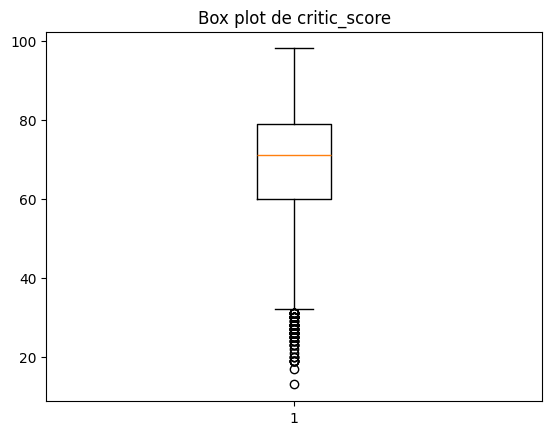

In [8]:
# Evaluar con un box plot el campo de critic_score, para determinar como rellenar los valores ausentes 

evaluar_ausentes_critic = df_clean[df_clean['critic_score'].notna()]

# Guardar en variable solo la columna con los valores que nos interesa para graficar

critic_score_notna = evaluar_ausentes_critic['critic_score']

# Realizar diagrama de box plot de critic_score

plt.boxplot(critic_score_notna)
plt.title('Box plot de critic_score')
plt.show()


**Comentario:** Encontramos valores atipicos, asi que rellenaremos con la mediana los NaN de la columna critic_score

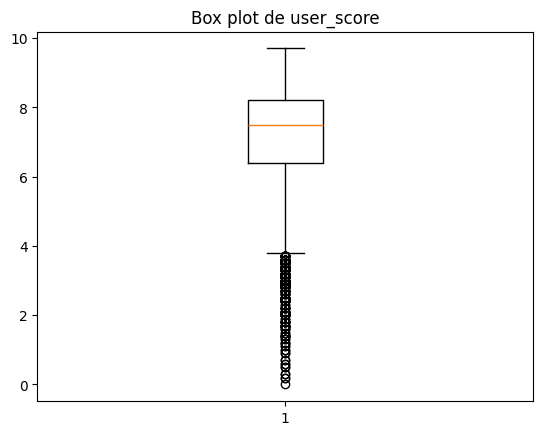

In [9]:
# Evaluar con un box plot el campo de user_score, para determinar como rellenar los valores ausentes 

# Filtrar nuestra columna user_score que no contega NaN y tbd 

filtro_notna_tbd_user =df_clean[df_clean['user_score'].notna() & ~(df_clean['user_score']=='tbd')].copy()

# Convertir a tipo numerico para para evaluar en nuestro box plot

filtro_notna_tbd_user['user_score'] = pd.to_numeric(filtro_notna_tbd_user['user_score'], errors='coerce')

# Forzar el tipo de dato

filtro_notna_tbd_user['user_score'] = filtro_notna_tbd_user['user_score'].astype('float')

# Guardar en variable solo la columna con los valores que nos interesa para graficar

user_score_notna = filtro_notna_tbd_user['user_score']

# Realizar diagrama de box plot de critic_score

plt.boxplot(user_score_notna)
plt.title('Box plot de user_score')
plt.show()


**Comentario:** Encontramos valores atipicos, asi que rellenaremos con la mediana los NaN de la columna user_score

In [10]:
# Rellenar ausentes NaN de la columna rating

clean_df = df_clean.copy()

clean_df['rating'] = clean_df['rating'].fillna('RP')

# Imprimir cambio realizado

rating_val_clean = clean_df['rating'].unique()

display(rating_val_clean)


array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [11]:
# Calcular mediana de la columna critic_score 

filtro_critic = clean_df[clean_df['critic_score'].notna()]

# Ordenar valores de mi campo critic_score

filtro_critic = filtro_critic['critic_score'].sort_values()

# Calcular la mediana

mediana_critic = filtro_critic.median()

print('Mediana de critic_score es:', mediana_critic)


Mediana de critic_score es: 71.0


In [12]:
# Calcular mediana de la columna user_score

# Ordenar valores de mi campo user_score

filtro_user = user_score_notna.sort_values()

# Calcular la mediana

mediana_user = filtro_user.median()

print('Mediana de user_score es:', mediana_user)


Mediana de user_score es: 7.5


In [13]:
# Rellenar ausentes NaN de la columna critic_score y user_score con las medianas calculadas para cada caso

df_games_clean = clean_df.copy()

df_games_clean['critic_score'] = df_games_clean['critic_score'].fillna(71.0)
df_games_clean['user_score'] = df_games_clean['user_score'].fillna(7.5)

df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
# Rellenar los tbd user_score con la mediana que usamos para rellenar los NaN

df_games_clean['user_score'] = df_games_clean['user_score'].replace('tbd', 7.5)


In [15]:
# Calcular el porcentaje de valores ausentes

porcentaje_ausentes = df_games_clean['year_of_release'].isnull().mean() * 100

print(porcentaje_ausentes)

1.609332934489979


**Comentario:** Rellenaremos los ausentes de años de lanzamiento NaN con un valor de fecha frecuente, dado que el porcentaje de valores NaN
es realmente muy pequeño, no afecta el análisis de datos, solo rellenaremos con fechas aquellos nombres de videos juegos que contengan el  año en el mismo nombre.

Utilizaremos el año más frecuente para mantener una integridad de datos, sin necesidad de introducir un sesgo significativo.

In [16]:
# Filtrar nombres que contienen un año en name (números de 4 dígitos)

filtro_nan_name = df_games_clean[df_games_clean['year_of_release'].isna() & (df_games_clean['name'].str.contains(r'\d{4}', na=False))]

display(filtro_nan_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,71.0,7.5,RP
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,71.0,7.5,RP
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,7.5,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


In [17]:
df_games_clean_year = df_games_clean.copy()

data_year = {'Madden NFL 2004': 2004.0,
            'FIFA Soccer 2004': 2004.0,
            'wwe Smackdown vs. Raw 2006': 2006.0,
            'NASCAR Thunder 2003': 2003,
            'PES 2009: Pro Evolution Soccer': 2009.0,
            'Madden NFL 2002': 2002.0,
            'NFL GameDay 2003': 2003.0,
            'NBA Live 2003': 2003.0,
            'Tomb Raider (2013)': 2013.0,
            'All-Star Baseball 2005':2005.0, 
            'NBA Live 2003': 2003.0,
            'All-Star Baseball 2005': 2005.0,
            'Tour de France 2011': 2011.0,
            'Sega Rally 2006': 2006.0,
            'PDC World Championship Darts 2008': 2008.0,
            'Football Manager 2007': 2007.0,
            'PDC World Championship Darts 2008': 2008.0
            }

# Filtrar los índices donde 'year_of_release' es NaN y el nombre contiene un año

filtro_indices = df_games_clean_year.index[df_games_clean_year['year_of_release'].isna() & (df_games_clean_year['name'].str.contains(r'\d{4}', na=False))]

# Usamos .loc para asignar los valores del año usando el diccionario creado

df_games_clean_year.loc[filtro_indices, 'year_of_release'] = df_games_clean_year.loc[filtro_indices, 'name'].map(data_year)

# Impresion de muestra despues del reemplazo

filtro_name_year = df_games_clean_year[df_games_clean_year['name']=='PDC World Championship Darts 2008']

display(filtro_name_year)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.0,0.00,71.0,7.5,RP
16373,PDC World Championship Darts 2008,PSP,2008.0,Sports,0.01,0.00,0.0,0.00,43.0,7.5,E10+


In [18]:
# Contar ocurrencias y obtener el año más frecuente

año_mas_frecuente = df_games_clean['year_of_release'].value_counts().idxmax()

print("El año más frecuente es:", año_mas_frecuente)


El año más frecuente es: 2008.0


In [19]:
# Usaremos el año más frecuente para rellenar el restante de valores NaN de year_of_release

df_games_clean_fill = df_games_clean_year.copy()

df_games_clean_fill['year_of_release'] = df_games_clean_fill['year_of_release'].fillna(2008.0)

df_games_clean_fill.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Realizamos cambio en el tipo de datos de los siguientes campos:

- year_of_release a int 
- critic_score a float 
- user_score a float 

In [20]:
# Realizar cambio del tipo de dato

df_games_dtype = df_games_clean_fill.copy()

df_games_dtype['year_of_release'] = df_games_dtype['year_of_release'].astype('int')
df_games_dtype['user_score'] = df_games_dtype['user_score'].astype('float')

df_games_dtype.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
# Muestra de nuestro datos casi limpios

display(df_games_dtype)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP


In [22]:
# Evaluando los las 2 filas con NaN

df_games = df_games_dtype.copy()

ausentes_name = df_games[df_games_clean['genre'].isna()]

display(ausentes_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,71.0,7.5,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,71.0,7.5,RP


In [23]:
# Rellenaremos con Unknown

df_games['name'] = df_games['name'].fillna('Unknown')
df_games['genre'] = df_games['genre'].fillna('Unknown')

df_games.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Conclusiones de Conversión y Limpieza de Datos

- Se realizó conversión en minúscula de los nombres de los campos, para poder trabajar con ellos con más facilidad.
- Se realizó diagrama de box plot para critic_score y user_score y asi evaluar de que forma tratar los valores ausentes de esos campos, para ambos casos se trabajo con la mediana dada los valores atípicos que nos arrojó el box plot.
- Rellenarenos los ausentes de años de lanzamiento NaN con un valor de fecha frecuente, dado que el porcentaje de valores NaN es realmente muy pequeño, no afecta el analisis de datos, solo rellenaremos con fechas aquellos nombres de videos juegos que contengan el año en el mismo nombre.
- Los unicos 2 valores del campo name y genre se rellenaron 'Unknown'.
- Los "to be determined" se cambiaron por RP: Rating Pending (Clasificación pendiente), ya que pertenece a la clasificación que establece Entertainment Software Rating Board (ESRB),clasificación que es utilizada en nuestro dataframe para categorizar los videosjuegos.

# 3. Cálculo de Ventas Totales <a id='as3'></a>


In [24]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

df_games_sales = df_games.copy()

df_games_sales['total_sales'] = df_games_sales['na_sales'] + df_games_sales['eu_sales'] +  df_games_sales['jp_sales']

display(df_games_sales)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP,0.01


# 4. Análisis de Datos <a id='as4'></a>


#### 4.1. Juegos que fueron lanzados en diferentes años. ¿Son significativos los datos de cada período? <a id='as5'></a>

In [25]:
# Realizamos un groupby por nombre de los juegos, años y calcular la cantidad de juegos por videojuegos

filtro_cant_games = df_games_sales.groupby('year_of_release')['name'].count().reset_index(name='total_games')

display(filtro_cant_games.head())

,year_of_release,total_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


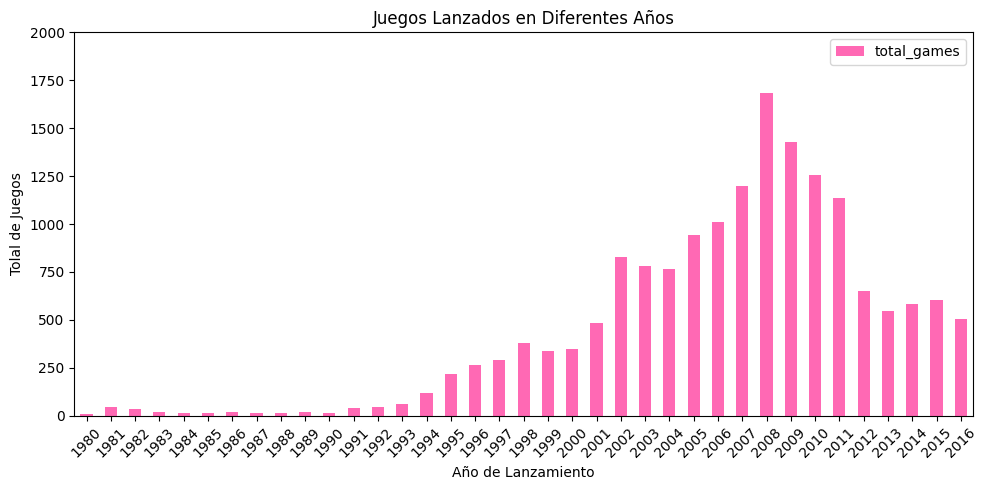

In [26]:
filtro_cant_games.plot(kind='bar', x='year_of_release', color='hotpink', figsize=(10, 5))

# Añadir títulos y etiquetas
plt.title('Juegos Lanzados en Diferentes Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Tolal de Juegos')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.ylim(0,2000)
plt.show()

**Comentario:** Los datos de cada período en el gráfico son sumamente significativos para entender la evolución de la industria de los videojuegos. Observamos como los años 2008 y 2009 destacan por tener el mayor número de juegos lanzados.  Ya a partir del 2011 en adelante, aunque se observa un baja de ventas, esta parece estabilizarse y mantenerse a través del tiempo.

#### 4.2. Plataforma con mayores ventas basado en los  en los datos de cada año

In [27]:
# Agrupar por plataforma y año de lanzamiento

platform_sales = df_games_sales.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name='total_sales')

display(platform_sales)

,platform,year_of_release,total_sales
0,2600,1980,11.26
1,2600,1981,35.36
2,2600,1982,28.57
3,2600,1983,5.78
4,2600,1984,0.27
...,...,...,...
241,XB,2008,5.06
242,XOne,2013,17.21
243,XOne,2014,49.26
244,XOne,2015,54.67


In [28]:
# Realizar suma total de las ventas de las plataformas basado en los datos de cada año

df_max_sales =  platform_sales.groupby('platform', as_index=False)['total_sales'].sum()

display(df_max_sales)


,platform,total_sales
0,2600,96.07
1,3DO,0.10
2,3DS,245.64
3,DC,15.68
4,DS,746.86
5,GB,247.26
6,GBA,310.12
7,GC,193.75
8,GEN,29.80
9,GG,0.04


#### 4.3. Las 10 Plataformas con más ventas

In [29]:
filtro_plat = df_max_sales.nlargest(10,'total_sales').reset_index(drop=True)

display(filtro_plat)

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.86
5,PS,689.95
6,GBA,310.12
7,PS4,265.79
8,PSP,252.63
9,XB,249.02


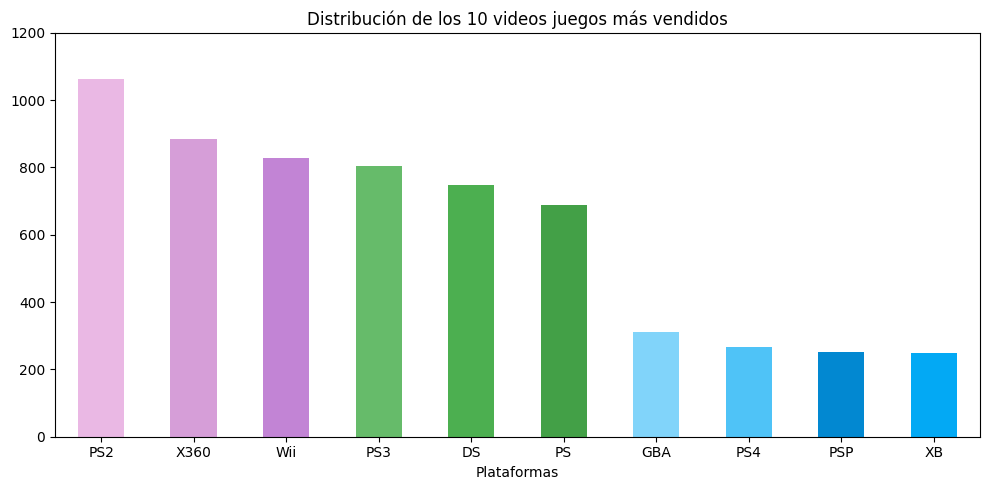

In [30]:
colors = ['#EAB8E4',  # Morado claro
          '#D69ED8',  # Morado pastel
          '#C284D5',  # Morado suave
          '#66BB6A',  # Verde medio
          '#4CAF50',  # Verde brillante
          '#43A047',  # Verde intermedio
          '#81D4FA',  # Azul suave
          '#4FC3F7',  # Azul medio
          '#0288D1',  # Azul oscuro
          '#03A9F4',  # Azul intermedio
]

filtro_plat.plot(kind='bar', x='platform', y='total_sales', color=colors, figsize=(10, 5),legend=False)

# Añadir títulos y etiqueta

plt.title('Distribución de los 10 videos juegos más vendidos')
plt.xlabel('Plataformas')

# Mostrar el gráfico

plt.xticks(rotation=0)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.ylim(0,1200)

plt.show()

**Comentario:** Podemos observar que nuestras 10 plataformas que lideran, como las principales con más ventas son: PS2, X360, Wii, PS3, DS, PS, GBA, PS4, PSP y XB. Siendo las 3 plataformas lideres PS2, X360 y Wii.

In [31]:
# Para cada plataforma, el año donde tuvieron mayores ventas

df_max_sales = platform_sales.loc[platform_sales.groupby('platform')['total_sales'].idxmax()].reset_index(drop=True)

display(df_max_sales)


,platform,year_of_release,total_sales
0,2600,1981,35.36
1,3DO,1995,0.08
2,3DS,2011,58.80
3,DC,2000,5.86
4,DS,2008,137.49
5,GB,1989,63.57
6,GBA,2004,76.10
7,GC,2002,50.48
8,GEN,1992,12.27
9,GG,1992,0.04


,platform,year_of_release,total_sales
0,GB,1989,63.57
1,PS,1998,160.44
2,PS2,2002,183.66
3,GBA,2004,76.10
4,XB,2004,63.29
5,DS,2008,137.49
6,Wii,2009,189.43
7,X360,2010,155.80
8,PS3,2011,135.22
9,PS4,2015,100.44


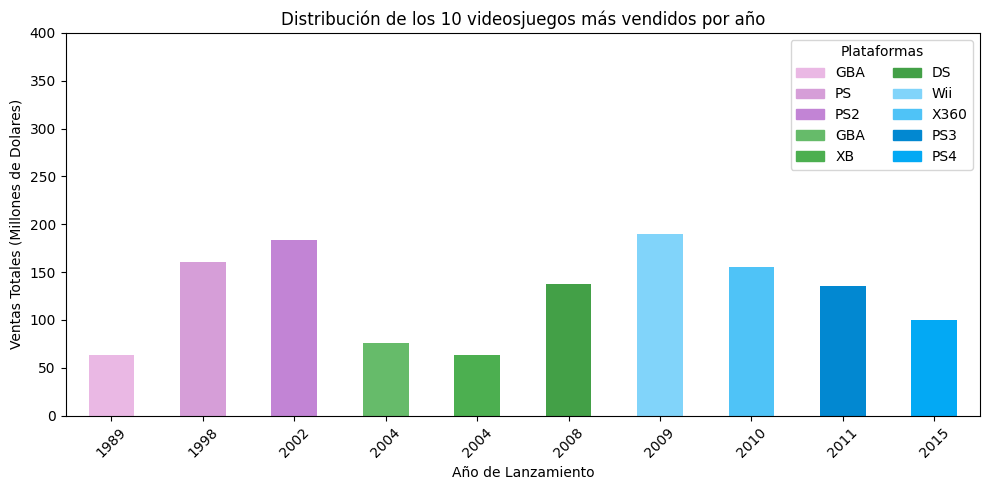

In [32]:
# Filtrar las 10 Plataformas con más ventas

filtro_plat = df_max_sales.nlargest(10,'total_sales').sort_values(by='year_of_release').reset_index(drop=True)

display(filtro_plat)

# Realizar gráfica de las 10 Plataformas con más  ventas

colors = ['#EAB8E4',  # Morado claro
          '#D69ED8',  # Morado pastel
          '#C284D5',  # Morado suave
          '#66BB6A',  # Verde medio
          '#4CAF50',  # Verde brillante
          '#43A047',  # Verde intermedio
          '#81D4FA',  # Azul suave
          '#4FC3F7',  # Azul medio
          '#0288D1',  # Azul oscuro
          '#03A9F4',  # Azul intermedio
]

filtro_plat.plot(kind='bar', x='year_of_release', y='total_sales', color=colors, figsize=(10, 5),legend=False)

# Añadir títulos y etiqueta

plt.title('Distribución de los 10 videosjuegos más vendidos por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Millones de Dolares)')

# Mostrar el gráfico

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.ylim(0,400)


# Crear la leyenda manualmente utilizando patches
legend_handles = [mpatches.Patch(color=colors[i], label=label) for i, label in enumerate(['GBA', 'PS', 'PS2', 'GBA', 'XB', 'DS', 'Wii', 'X360', 'PS3', 'PS4'])]

# Asignar la leyenda
plt.legend(title='Plataformas', handles=legend_handles, loc='upper right', ncol=2, fontsize=10)

plt.show()

**Comentario** Podemos observar las plataformas con más ventas por cada año, dentro de los 3 principales encontramos PS2, DS, Wii y X360.

#### 4.4. Las Plataformas antiguas con más ventas en los primeros 13 años 

In [33]:
nunique_year =  platform_sales['year_of_release'].nunique()
print(nunique_year)

37


**Comentario:** Para establecer una referencia de antigüedad en el análisis, podríamos dividir los 37 años de datos en períodos históricos, considerando las plataformas antiguas como aquellas cuya fecha de lanzamiento está en el tercio inicial del rango. Esto sugiere que podríamos considerar como “plataformas antiguas”, aquellas que fueron lanzadas en los primeros 12-13 años.
Por ejemplo:

- Antiguas: Primeros 12-13 años.
- Intermedias: Siguientes 12 años.
- Modernas: Últimos 12-13 años.

In [34]:
# Filtramos los primeros 13 años de video juegos

platform_sales_fil =  platform_sales[(platform_sales['year_of_release']>=1980) & (platform_sales['year_of_release']<=1993)]

platform_sales_fil = platform_sales_fil.sort_values(by=['platform', 'year_of_release'])

display(platform_sales_fil)

,platform,year_of_release,total_sales
0,2600,1980,11.26
1,2600,1981,35.36
2,2600,1982,28.57
3,2600,1983,5.78
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.93
8,2600,1988,0.73
9,2600,1989,0.62


In [35]:
# Listado de Plataformas antiguas

platform_unique_old = platform_sales_fil['platform'].unique()
print(platform_unique_old)

['2600' 'DS' 'GB' 'GEN' 'GG' 'NES' 'NG' 'PC' 'SCD' 'SNES']


In [36]:
# Para cada plataforma, seleccionar el año con mayores ventas

df_max_sales_previus = platform_sales_fil.loc[platform_sales_fil.groupby('platform')['total_sales'].idxmax()].reset_index(drop=True)

display(df_max_sales_previus)


,platform,year_of_release,total_sales
0,2600,1981,35.36
1,DS,1985,0.02
2,GB,1989,63.57
3,GEN,1992,12.27
4,GG,1992,0.04
5,NES,1985,52.53
6,NG,1993,0.21
7,PC,1992,2.92
8,SCD,1993,1.45
9,SNES,1993,39.24


**Comentario:** Teniendo las plataformas con mayores ventas, buscaremos el primer año de lanzamiento de cada plataforma y luego la ultimo año de lanzamiento de esa plataforma, de esta manera obtener cuanto han tardado en desaparecer plataformas antiguas.

In [37]:
# Primer año de lanzamiento para cada plataforma

firts_release_old =  platform_sales_fil.loc[platform_sales_fil.groupby('platform')['year_of_release'].idxmin(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release a first_release_old

firts_release_old = firts_release_old.rename(columns={'year_of_release': 'firts_release_old','total_sales': 'total_firts_old'})

display(firts_release_old)

,platform,firts_release_old,total_firts_old
0,2600,1980,11.26
1,DS,1985,0.02
2,GB,1988,1.40
3,GEN,1990,2.52
4,GG,1992,0.04
5,NES,1983,10.88
6,NG,1993,0.21
7,PC,1985,0.03
8,SCD,1993,1.45
9,SNES,1990,25.48


In [38]:
# Ultimo año de lanzamiento hasta la fecha 

second_release_old = platform_sales.loc[platform_sales.groupby('platform')['year_of_release'].idxmax(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release a first_release_old

second_release_old = second_release_old.rename(columns={'year_of_release': 'second_release_old','total_sales': 'total_second_old'})

display(second_release_old)

,platform,second_release_old,total_second_old
0,2600,2008,10.43
1,3DO,1995,0.08
2,3DS,2016,14.50
3,DC,2008,0.04
4,DS,2013,1.42
5,GB,2008,0.99
6,GBA,2008,4.85
7,GC,2008,1.86
8,GEN,1994,7.82
9,GG,1992,0.04


In [39]:
# Hacer una union de ambas tablas, para tener nuestras “Plataformas Antiguas”

merge_platform = pd.merge(firts_release_old, second_release_old, on=('platform'), how='inner')

# Realizar resta del ultimo año de lanzamiento con el primero año de lanzamiento, para conocer la cantidad de años transcurridos entre un
# nuevo lanzamiento y otro

merge_platform['duration_old'] = merge_platform['second_release_old'] - merge_platform['firts_release_old'] 

display(merge_platform)


,platform,firts_release_old,total_firts_old,second_release_old,total_second_old,duration_old
0,2600,1980,11.26,2008,10.43,28
1,DS,1985,0.02,2013,1.42,28
2,GB,1988,1.40,2008,0.99,20
3,GEN,1990,2.52,1994,7.82,4
4,GG,1992,0.04,1992,0.04,0
5,NES,1983,10.88,1994,0.11,11
6,NG,1993,0.21,1996,0.10,3
7,PC,1985,0.03,2016,4.89,31
8,SCD,1993,1.45,1994,0.36,1
9,SNES,1990,25.48,1999,0.26,9


#### 4.5.  Buscar las plataformas que solían ser populares pero que ahora no tienen ventas


**Comentario:** Ya con la tabla que tenemos solo filtramos las plataformas que sean a menores a 2003. Pudiendo saber las plataformas que del 2003 en adelante no siguieron generando ventas. Ya que para nuestro estudio, establecimos que nuestra plataformas modernas, se encuentran de 2003 en adelante.

In [40]:
filtro_plat_sales_old = merge_platform[(merge_platform['second_release_old']<=2003)].reset_index(drop=True)

# Conocer el tiempo promedio en el mercado de estas plataformas

platform_sort_old = filtro_plat_sales_old['duration_old'].sort_values()

mean_platform_old = platform_sort_old.mean()

display(filtro_plat_sales_old)

print('Tiempo promedio de duración en el mercado de plataformas antiguas:',mean_platform_old.round(2))

,platform,firts_release_old,total_firts_old,second_release_old,total_second_old,duration_old
0,GEN,1990,2.52,1994,7.82,4
1,GG,1992,0.04,1992,0.04,0
2,NES,1983,10.88,1994,0.11,11
3,NG,1993,0.21,1996,0.10,3
4,SCD,1993,1.45,1994,0.36,1
5,SNES,1990,25.48,1999,0.26,9


Tiempo promedio de duración en el mercado de plataformas antiguas: 4.67


##### **Comentario:** Las plataformas que anteriormente eran muy populares en ventas y ya no generan ventas, tenemos a **GEN, GG, NES, NG, SCD Y SNES**. Tambien podemos responder que tiempo que tardan en desaparecer estas plataformas es de 5 años.

#### 4.6. Plataformas modernas con más ventas en los ultimos de 13 años

In [41]:
# Excluir plataformas antiguas que siguen vigentes, solo nos interesa las plataformas modernas

platform_unique_old

df_filtrado_new = platform_sales[~platform_sales['platform'].isin(platform_unique_old)]

display(df_filtrado_new)


,platform,year_of_release,total_sales
11,3DO,1994,0.02
12,3DO,1995,0.08
13,3DS,2008,1.10
14,3DS,2011,58.80
15,3DS,2012,48.77
...,...,...,...
241,XB,2008,5.06
242,XOne,2013,17.21
243,XOne,2014,49.26
244,XOne,2015,54.67


In [42]:
# Filtramos los ultimos 13 años de video juegos, excluyendo a las plataformas antiguas que siguen vigente

platform_sales_modern =  df_filtrado_new[(df_filtrado_new['year_of_release']>=2003) & (df_filtrado_new['year_of_release']<=2016)]

# Para cada plataforma, seleccionar el año con mayores ventas

df_max_sales_modern = platform_sales_modern.loc[platform_sales_modern.groupby('platform')['total_sales'].idxmax()].reset_index(drop=True)

display(df_max_sales_modern)


,platform,year_of_release,total_sales
0,3DS,2011,58.80
1,DC,2008,0.04
2,GBA,2004,76.10
3,GC,2003,49.59
4,N64,2008,0.60
5,PS,2008,3.06
6,PS2,2004,179.48
7,PS3,2011,135.22
8,PS4,2015,100.44
9,PSP,2006,46.35


In [43]:
# Primer año de lanzamiento para cada plataforma

firts_release_modern = df_games_sales.loc[df_games_sales.groupby('platform')['year_of_release'].idxmin(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release 

firts_release_modern = firts_release_modern.rename(columns={'year_of_release': 'firts_release_modern','total_sales': 'total_firts_modern'})

# Ultimo año de lanzamiento

second_release_modern = df_games_sales.loc[df_games_sales.groupby('platform')['year_of_release'].idxmax(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release 

second_release_modern = second_release_modern.rename(columns={'year_of_release': 'second_release_modern','total_sales': 'total_second_modern'})


In [44]:
# Hacer una union de ambas tablas, para tener nuestras “Plataformas Modernas”

merge_platform_modern = pd.merge(firts_release_modern, second_release_modern, on=('platform'), how='inner')

# Realizar resta del ultimo año de lanzamiento con el primero año de lanzamiento, para conocer la cantidad de años transcurridos entre un
# nuevo lanzamiento y otro

merge_platform_modern['duration_modern'] = merge_platform_modern['second_release_modern'] - merge_platform_modern['firts_release_modern'] 

# Excluir nuevamente plataformas antiguas que siguen vigentes, solo nos interesa las plataformas modernas

filtrado_new_plat = merge_platform_modern[~merge_platform_modern['platform'].isin(platform_unique_old)].reset_index(drop=True)

display(filtrado_new_plat)

,platform,firts_release_modern,total_firts_modern,second_release_modern,total_second_modern,duration_modern
0,3DO,1994,0.02,1995,0.06,1
1,3DS,2008,0.37,2016,6.69,8
2,DC,1998,2.33,2008,0.04,10
3,GBA,2000,0.07,2008,2.33,8
4,GC,2001,6.84,2008,0.52,7
5,N64,1996,11.67,2008,0.29,12
6,PCFX,1996,0.03,1996,0.03,0
7,PS,1994,1.18,2008,1.36,14
8,PS2,2000,3.70,2011,0.11,11
9,PS3,2006,3.60,2016,0.63,10


In [45]:
# Conocer el tiempo promedio de lanzamiento

merge_platform_modern_sort = filtrado_new_plat['duration_modern'].sort_values()

mean_platform_modern = merge_platform_modern_sort.mean()

print('Tiempo promedio de duración en el mercado de plataformas modernas:',mean_platform_modern.round(2))

Tiempo promedio de duración en el mercado de plataformas modernas: 6.95


#### 4.7. ¿Cuánto tardan generalm4ente las nuevas plataformas en aparecer y las antiguas en desaparecer?

- Las plataformas modernas tardan 7 años en aparecer 
- Las plataformas antiguas tardan 5 años en desaparecer

#### 4.8. ¿Qué plataformas son líderes en ventas? Elige varias plataformas potencialmente rentables.

Basada en nuestras plaformas que siguen vigentes en los ultimos 13 años, sin excluir ninguna. Simplemente todas las plataformas que siguen generando ventas. Inicialmente teniamos un rango mucho más amplio de plataformas, ya que evaluavamos todo el rango de  años de lanzamientos. Pero para el mercado más actual y estudio, es eficiente estudiar el rango de las plataformas que siguen vigente y que en la actualidad y ultimos 13 años puedan generar ventas significativas, para poder obtener plataformas líderes.

In [46]:
platform_modern_sales =  df_games_sales[(df_games_sales['year_of_release']>=2003) & (df_games_sales['year_of_release']<=2016)]

groupby_platform_modern_sales = platform_modern_sales.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

display(groupby_platform_modern_sales)

,platform,year_of_release,total_sales
0,2600,2008,10.43
1,3DS,2008,1.10
2,3DS,2011,58.80
3,3DS,2012,48.77
4,3DS,2013,53.97
...,...,...,...
126,XB,2008,5.06
127,XOne,2013,17.21
128,XOne,2014,49.26
129,XOne,2015,54.67


In [47]:
# Realizar agrupacion nuevamente por plataforma, para calcular total de ventas por cada año y visualizar las plataformas que han generado mayores ventas

groupby_lider_platform = groupby_platform_modern_sales.groupby('platform', as_index=False)['total_sales'].sum().sort_values(by='total_sales', ascending=False).reset_index(drop=True)

display(groupby_lider_platform)

,platform,total_sales
0,X360,885.66
1,Wii,828.44
2,PS3,803.97
3,DS,746.84
4,PS2,693.43
5,PS4,265.79
6,PSP,252.63
7,3DS,245.64
8,XB,179.57
9,GBA,178.08


In [48]:
# Filtrar las 12 plataformas líderes

lideres_plat = groupby_lider_platform.nlargest(12,'total_sales').reset_index(drop=True)

display(lideres_plat)

print()

# Guardar en forma de array 

lideres_platform = lideres_plat['platform'].values

print(lideres_platform)

,platform,total_sales
0,X360,885.66
1,Wii,828.44
2,PS3,803.97
3,DS,746.84
4,PS2,693.43
5,PS4,265.79
6,PSP,252.63
7,3DS,245.64
8,XB,179.57
9,GBA,178.08



['X360' 'Wii' 'PS3' 'DS' 'PS2' 'PS4' 'PSP' '3DS' 'XB' 'GBA' 'PC' 'XOne']


#### 4.9.  ¿Cuáles crecen y cuáles se reducen?

Filtramos plataformas líderes para graficar, en gráfico de lineas.

In [49]:
groupby_platform_modern_sales_x360 = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='X360']
groupby_platform_modern_sales_wii = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='Wii']
groupby_platform_modern_sales_ps3 = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='PS3']
groupby_platform_modern_sales_ds = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='DS']
groupby_platform_modern_sales_ps2 = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='PS2']
groupby_platform_modern_sales_ps4 = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='PS4']
groupby_platform_modern_sales_psp = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='PSP']
groupby_platform_modern_sales_3ds = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='3DS']
groupby_platform_modern_sales_xb = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='XB']
groupby_platform_modern_sales_gba = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='GBA']
groupby_platform_modern_sales_pc = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='PC']
groupby_platform_modern_sales_xone = groupby_platform_modern_sales[groupby_platform_modern_sales['platform']=='XOne']

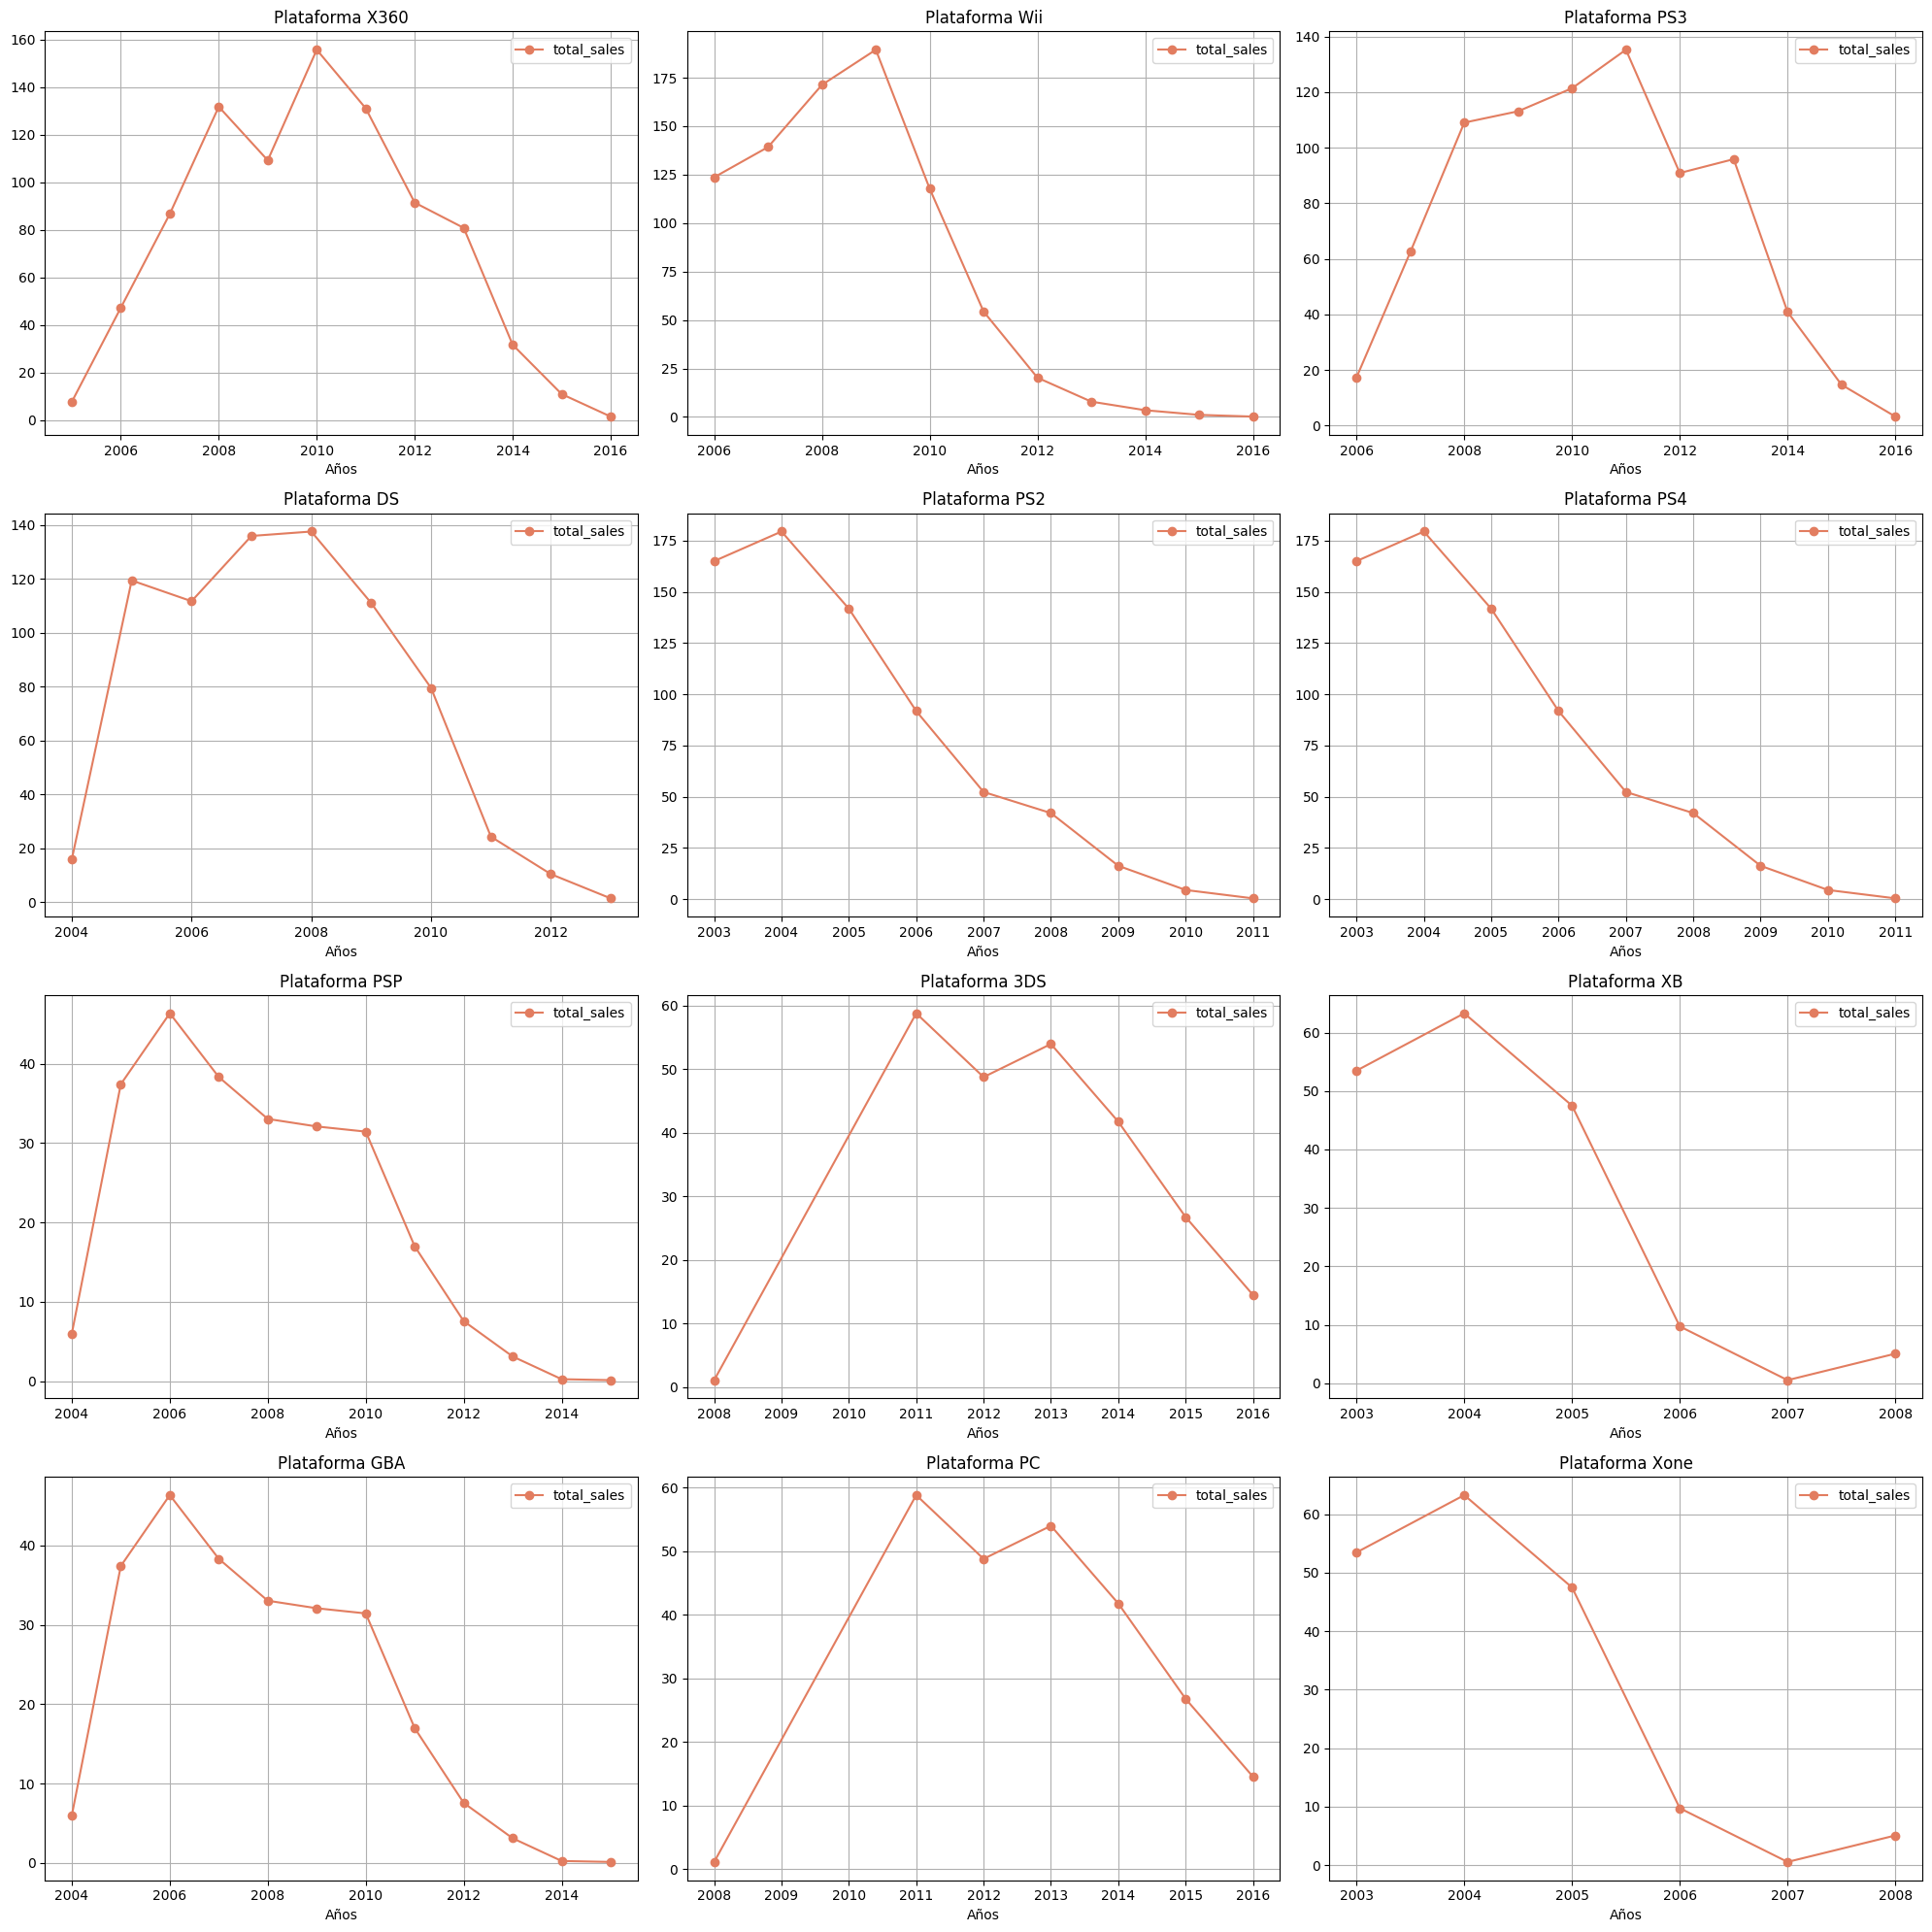

In [50]:
# Crear la figura y los ejes

colors = [
    '#E27D60',  # Coral
    '#C38D9E',  # Rosa suave
    '#E74C3C',  # Rojo vibrante
    '#F39C12',  # Naranja
    '#8E44AD',  # Morado profundo
    '#2980B9',  # Azul intenso
    '#BDC3C7',  # Gris claro
]

# Crear una figura con dos ejes (subplots)

fig, axs = plt.subplots(4, 3, figsize=(20, 20))  

# Aplanar los ejes para facilitar el acceso
axs = axs.flatten()

# Primer gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_x360.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[0])
axs[0].set_title('Plataforma X360')
axs[0].set_xlabel('Años')
axs[0].grid(True)


# Segundo gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_wii.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[1])
axs[1].set_title('Plataforma Wii')
axs[1].set_xlabel('Años')
axs[1].grid(True)

# Tercer gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_ps3.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[2])
axs[2].set_title('Plataforma PS3')
axs[2].set_xlabel('Años')
axs[2].grid(True)

# Cuarto gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_ds.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[3])
axs[3].set_title('Plataforma DS')
axs[3].set_xlabel('Años')
axs[3].grid(True)

# Quinto gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_ps2.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[4])
axs[4].set_title('Plataforma PS2')
axs[4].set_xlabel('Años')
axs[4].grid(True)

# Sexto gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_ps2.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[5])
axs[5].set_title('Plataforma PS4')
axs[5].set_xlabel('Años')
axs[5].grid(True)

# Septimo gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_psp.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[6])
axs[6].set_title('Plataforma PSP')
axs[6].set_xlabel('Años')
axs[6].grid(True)

# Octavo gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_3ds.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[7])
axs[7].set_title('Plataforma 3DS')
axs[7].set_xlabel('Años')
axs[7].grid(True)

# Noveno gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_xb.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[8])
axs[8].set_title('Plataforma XB')
axs[8].set_xlabel('Años')
axs[8].grid(True)

# Decimo gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_psp.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[9])
axs[9].set_title('Plataforma GBA')
axs[9].set_xlabel('Años')
axs[9].grid(True)

# Decimo primero gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_3ds.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[10])
axs[10].set_title('Plataforma PC')
axs[10].set_xlabel('Años')
axs[10].grid(True)

# Decimo segundo gráfico de línea de plataformas en crecimiento o en disminución

groupby_platform_modern_sales_xb.plot(x='year_of_release', y='total_sales', kind='line', color=colors, marker='o', ax=axs[11])
axs[11].set_title('Plataforma Xone')
axs[11].set_xlabel('Años')
axs[11].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

#### **Comentarios:** Podemos observar la misma tendencia para las 12 plataformas, de un crecimiento incialmente los primeros 2 años, luego se va reduciendo a lo largo del tiempo, para cada una de las plataformas.

#### 4.10. Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Tomamos nuevamente el Dataframe de nuestras plafaformas modernas **lideres_plat**, que contiene las plataformas lideres y modernas de los ultimos 13 años. Ya que para nuestro estudio y poder determinar, y al mismo tiempo predecir plataformas con 
éxito, debemos basarnos en nuestras plataformas más actuales.

In [51]:

display(lideres_plat)


,platform,total_sales
0,X360,885.66
1,Wii,828.44
2,PS3,803.97
3,DS,746.84
4,PS2,693.43
5,PS4,265.79
6,PSP,252.63
7,3DS,245.64
8,XB,179.57
9,GBA,178.08


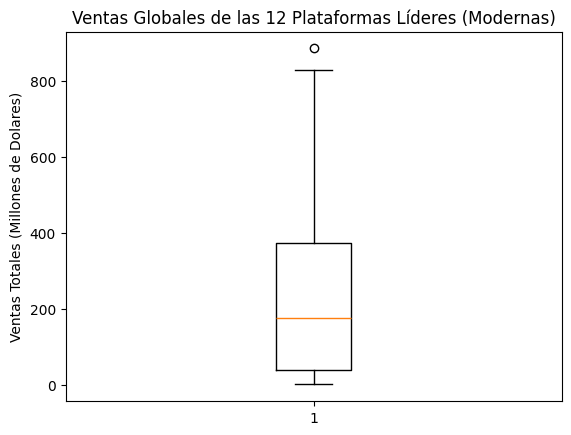

In [52]:
total_global = groupby_lider_platform['total_sales']

plt.boxplot(total_global)
plt.title('Ventas Globales de las 12 Plataformas Líderes (Modernas)')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.show()

**Comentario:** La mayoría de las plataformas tienen ventas similares. La presencia de un valor atípico (el punto por encima de la caja) sugiere que al menos una o que pocas plataformas tienen ventas mucho mayores que el resto.  La mediana está más cerca del borde inferior de la caja, lo que indica que la mayoría de las plataformas tienen ventas relativamente bajas o moderadas. El percentil 25 se encuentra alrededor de 50 millones de dolares, que significa que el 25% de las plataformas tienen ventas inferiores a ese valor. Por otro lado el percentil 75 (tercer cuartil), esta cerca de 350 millones de dolares, indicando que el 75% de las plataformas tienen ventas inferiores a ese valor. Esto implica que el rango intercuartilico (IQR) que representa la dispersión del 50% de los datos es bastante amplio, lo que sugiere una considerable variabilidad en las ventas de las diferentes plataformas.

#### 4.11. Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [53]:
# Tomamos nuestro Dataframe de filtrado con nuestras plataformas modernas

display(platform_modern_sales)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP,0.01


In [54]:
# Evaluemos las reseñas de nuestra 4ta plataforma lider

fil_review = platform_modern_sales[platform_modern_sales['platform']=='PS2']

fil_review_modern = fil_review.groupby(['platform','year_of_release','user_score'])['total_sales'].sum().reset_index()

display(fil_review_modern)


,platform,year_of_release,user_score,total_sales
0,PS2,2003,3.1,0.37
1,PS2,2003,3.6,0.38
2,PS2,2003,3.7,0.11
3,PS2,2003,3.9,0.21
4,PS2,2003,4.8,0.48
...,...,...,...,...
271,PS2,2010,7.9,0.05
272,PS2,2011,3.4,0.09
273,PS2,2011,6.2,0.11
274,PS2,2011,7.5,0.09


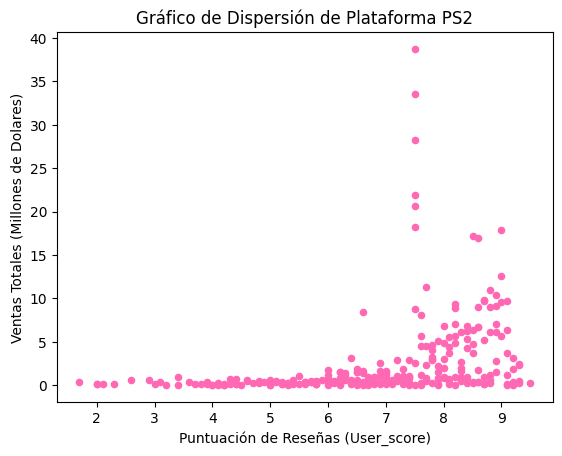


Correlación de Pearson: 0.3260332689394097


In [55]:
# Crear el gráfico de dispersión

fil_review_modern.plot.scatter(x='user_score', y='total_sales', color='hotpink', title='Gráfico de Dispersión de Plataforma PS2')
plt.xlabel('Puntuación de Reseñas (User_score)')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.show()

# Calcular la correlación de Pearson entre 'x' y 'y'
print()
correlacion = fil_review_modern['user_score'].corr(fil_review_modern['total_sales'])
print("Correlación de Pearson:", correlacion)

**Comentario:**  Los puntos están bastante dispersos en todo el gráfico, lo que indica una gran variabilidad en la ventas del video juego de esa plataforma. A pesar de la dispersión, podemos observar una leve tendencia, donde se denota puntuaciones más altas, tienden a tener un rango de ventas más amplio. Sin embargo, esta tendencia no es muy marcada y existen muchas con puntuaciones altas que no tuvieron grandes ventas.

#### 4.12. Comparando las ventas de los mismos juegos en otras plataformas.

In [56]:
# Agrupar por nombre de video juegos por sus ventas, para luego filtrar los 10 videos juegos con mas ventas

games_platforms = platform_modern_sales.groupby('name', as_index=False)['total_sales'].sum()

display(games_platforms)

,name,total_sales
0,Beyblade Burst,0.03
1,Fire Emblem Fates,1.56
2,Frozen: Olaf's Quest,1.01
3,Haikyu!! Cross Team Match!,0.04
4,Tales of Xillia 2,0.77
...,...,...
8586,thinkSMART: Chess for Kids,0.01
8587,uDraw Studio,2.22
8588,uDraw Studio: Instant Artist,0.17
8589,wwe Smackdown vs. Raw 2006,2.59


In [57]:
filtro_games_pv = games_platforms.nlargest(15,'total_sales').reset_index(drop=True)

display(filtro_games_pv)

,name,total_sales
0,Wii Sports,74.09
1,Grand Theft Auto V,48.68
2,Mario Kart Wii,32.23
3,Wii Sports Resort,29.82
4,Call of Duty: Black Ops,27.51
5,Call of Duty: Modern Warfare 3,27.31
6,New Super Mario Bros.,26.92
7,New Super Mario Bros. Wii,26.08
8,Wii Play,26.07
9,Call of Duty: Black Ops II,25.64


In [58]:
games_unique_pv = filtro_games_pv['name'].unique()

print(games_unique_pv)

['Wii Sports' 'Grand Theft Auto V' 'Mario Kart Wii' 'Wii Sports Resort'
 'Call of Duty: Black Ops' 'Call of Duty: Modern Warfare 3'
 'New Super Mario Bros.' 'New Super Mario Bros. Wii' 'Wii Play'
 'Call of Duty: Black Ops II' 'Call of Duty: Ghosts'
 'Call of Duty: Black Ops 3' 'Call of Duty: Modern Warfare 2' 'Nintendogs'
 'Mario Kart DS']


In [59]:
# Buscamos que plataformas contienen los videos juegos mas vendidos, aplicando isin a games_unique_pv ya que contiene los nombres de las 15 mas vendidas

games_unique_fill = platform_modern_sales[platform_modern_sales['name'].isin(games_unique_pv)].reset_index(drop=True)

display(games_unique_fill)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,RP,21.93
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,21.31
8,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
9,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86


In [60]:
# Usar pivot para transformar el DataFrame games_unique_fill

pivot_games_platforms = games_unique_fill.pivot(index='name', columns='platform', values='total_sales')

# Rellenar los valores NaN 0 (Ya que esos videos juegos no tuvieron ventas en esa plataforma)

pivot_df = pivot_games_platforms.fillna(0).add_suffix('')

display(pivot_df)


platform,DS,PC,PS3,PS4,Wii,WiiU,X360,XOne
name,,,,,,,,
Call of Duty: Black Ops,0.54,1.39,10.84,0.00,1.25,0.00,13.49,0.00
Call of Duty: Black Ops 3,0.00,0.25,1.43,12.25,0.00,0.00,1.54,6.71
Call of Duty: Black Ops II,0.00,1.33,11.37,0.00,0.00,0.38,12.56,0.00
Call of Duty: Ghosts,0.00,0.64,8.11,3.26,0.00,0.32,9.33,2.65
Call of Duty: Modern Warfare 2,0.00,0.80,9.01,0.00,0.00,0.00,12.19,0.00
Call of Duty: Modern Warfare 3,0.00,1.39,11.76,0.00,0.75,0.00,13.41,0.00
Grand Theft Auto V,0.00,1.08,17.09,10.65,0.00,0.00,14.86,5.00
Mario Kart DS,21.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mario Kart Wii,0.00,0.00,0.00,0.00,32.23,0.00,0.00,0.00


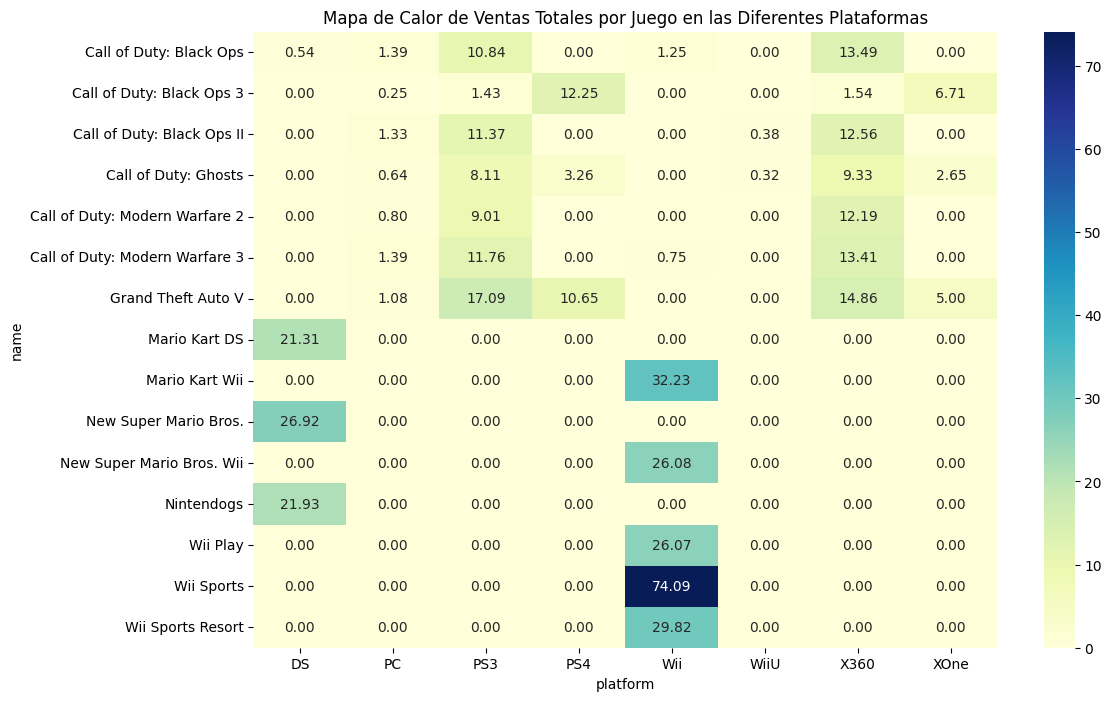

In [61]:
# Crear el gráfico de calor

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Mapa de Calor de Ventas Totales por Juego en las Diferentes Plataformas')
plt.show()

#### **Comentario:** Podemos observar que los videosjuegos que tienden a tener ventas similares en distintas plataformas son: 

- Call of Duty: Black Ops II
- Call of Duty: Ghosts
- Call of Duty: Modern Wafare 2
- Call of Duty: Modern Wafare 3
- Grand Theft Auto V

#### Estos juegos ubicados en las plataformas de PS3 y X360. Plataformas que estan en el rango de las 3 principales como lideres.

#### 4.13. Distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [62]:
# Tomamos nuestro Dataframe de filtrado con nuestras plataformas modernas

display(platform_modern_sales)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP,0.01


In [63]:
# Agrupamos por genero y ventas

fil_games_modern_genre = platform_modern_sales.groupby('genre')['total_sales'].sum().reset_index()

display(fil_games_modern_genre)

,genre,total_sales
0,Action,1209.01
1,Adventure,151.18
2,Fighting,225.23
3,Misc,613.10
4,Platform,359.57
5,Puzzle,114.29
6,Racing,399.14
7,Role-Playing,591.14
8,Shooter,748.64
9,Simulation,277.02


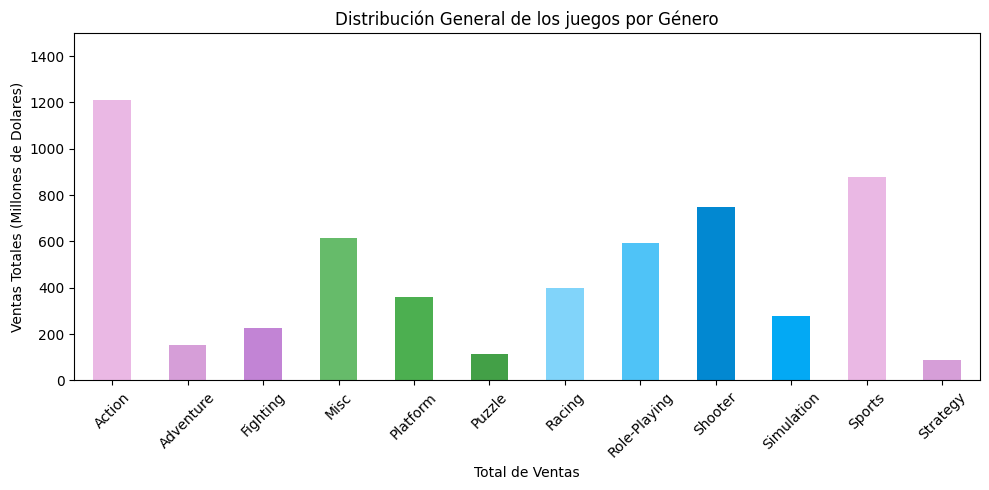

In [64]:
# Realizar gráfica de las 10 Plataformas con más  ventas

colors = ['#EAB8E4',  # Morado claro
          '#D69ED8',  # Morado pastel
          '#C284D5',  # Morado suave
          '#66BB6A',  # Verde medio
          '#4CAF50',  # Verde brillante
          '#43A047',  # Verde intermedio
          '#81D4FA',  # Azul suave
          '#4FC3F7',  # Azul medio
          '#0288D1',  # Azul oscuro
          '#03A9F4',  # Azul intermedio
]

fil_games_modern_genre.plot(kind='bar', x='genre', y='total_sales', color=colors, figsize=(10, 5),legend=False)

# Añadir títulos y etiqueta

plt.title('Distribución General de los juegos por Género')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.xlabel('Total de Ventas')

# Mostrar el gráfico

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.ylim(0,1500)

plt.show()

#### **Comentario:** 
Podemos observar que nuestros géneros que parecen ser más rentables encontramos a: 'Action', 'Sports' y en tercer lugar 'Shooter'. Podemos observar claramente que son los géneros que dominan el mercado, con ventas superiores a los 800 millones de dolares.

# 5. Crear un perfil de usuario para cada región

#### 5.1. Crea un perfil de usuario para cada región (NA, UE, JP) 

In [65]:
# Tomamos nuestro Dataframe de filtrado con nuestras plataformas modernas

display(platform_modern_sales)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP,0.01


In [66]:
# Agrupar por plataforma y sumar ventas

platform_NA = platform_modern_sales.groupby('platform', as_index=False)['na_sales'].sum()

# Suma de las ventas totales de na_sales

sum_NA = platform_modern_sales['na_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_NA= platform_NA.sort_values(by='na_sales', ascending=False).reset_index(drop=True)

# Diez plataformas principales con mas ventas

platform_NA = platform_NA.nlargest(10,'na_sales').reset_index(drop=True)

display(platform_NA)

print('Suma total de ventas de la region NA:',sum_NA)


,platform,na_sales
0,X360,602.47
1,Wii,496.90
2,PS3,393.49
3,PS2,391.73
4,DS,382.40
5,XB,134.76
6,PSP,109.17
7,PS4,108.74
8,GBA,108.23
9,XOne,93.12


Suma total de ventas de la region NA: 3103.56


In [67]:
# Agrupar por plataforma y sumar ventas

platform_EU = platform_modern_sales.groupby('platform', as_index=False)['eu_sales'].sum()

# Suma de las ventas totales de eu_sales

sum_EU = platform_modern_sales['eu_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_EU = platform_EU.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)

# Diez plataformas principales con mas ventas

platform_EU = platform_EU.nlargest(10,'eu_sales').reset_index(drop=True)

display(platform_EU)

print('Suma total de ventas de la region NA:',sum_EU)

,platform,eu_sales
0,PS3,330.29
1,X360,270.76
2,Wii,262.21
3,PS2,211.01
4,DS,188.89
5,PS4,141.09
6,PC,117.54
7,PSP,66.68
8,3DS,61.48
9,XOne,51.59


Suma total de ventas de la region NA: 1852.64


In [68]:
# Agrupar por plataforma y sumar ventas

platform_JP = platform_modern_sales.groupby('platform', as_index=False)['jp_sales'].sum()

# Suma de las ventas totales de na_sales

sum_JP = platform_modern_sales['jp_sales'].sum().round(2)

# Ordenar las ventas de mayor a menor

platform_JP = platform_JP.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)

# Diez plataformas principales con mas ventas

platform_JP = platform_JP.nlargest(10,'jp_sales').reset_index(drop=True)

display(platform_JP)

print('Suma total de ventas de la region JP:',sum_JP)

,platform,jp_sales
0,DS,175.55
1,3DS,100.67
2,PS2,90.69
3,PS3,80.19
4,PSP,76.78
5,Wii,69.33
6,GBA,27.66
7,PSV,21.91
8,PS4,15.96
9,WiiU,13.01


Suma total de ventas de la region JP: 698.13


#### 5.2. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

**Comentario:** En este caso como deseamos comparar cuotas entre regiones, realizamos merge tipo inner, para tener en una sola tabla
integrada, aquellas plataformas que generan ventas en las 3 regiones, y poder describir las variaciones entre ellas. Ya que tenemos plataformas, que aunque ciertamente generan una cantidad de ventas en una región, en otras regiones no generan ventas, ni se posicionan entre los 10 primeros lugares. Y para estudiar un poco esta variabilidad en plataformas que se encuentren presenten en ambas regiones, como mencionanos, nos viene bien estudiar las que se encuentren presenten en las 3 regiones.

In [69]:
merge_na_eu = pd.merge(platform_NA, platform_EU, on='platform', how='inner')

merge_na_eu_jp = pd.merge(merge_na_eu, platform_JP, on='platform', how='inner')

sum_total = merge_na_eu_jp['na_sales'] + merge_na_eu_jp['eu_sales'] + merge_na_eu_jp['jp_sales']

merge_na_eu_jp['quota_NA'] = ((merge_na_eu_jp['na_sales']/sum_total)*100).round(2)
merge_na_eu_jp['quota_EU'] = ((merge_na_eu_jp['eu_sales']/sum_total)*100).round(2)
merge_na_eu_jp['quota_JP'] = ((merge_na_eu_jp['jp_sales']/sum_total)*100).round(2)

display(merge_na_eu_jp)


,platform,na_sales,eu_sales,jp_sales,quota_NA,quota_EU,quota_JP
0,Wii,496.90,262.21,69.33,59.98,31.65,8.37
1,PS3,393.49,330.29,80.19,48.94,41.08,9.97
2,PS2,391.73,211.01,90.69,56.49,30.43,13.08
3,DS,382.40,188.89,175.55,51.20,25.29,23.51
4,PSP,109.17,66.68,76.78,43.21,26.39,30.39
5,PS4,108.74,141.09,15.96,40.91,53.08,6.00


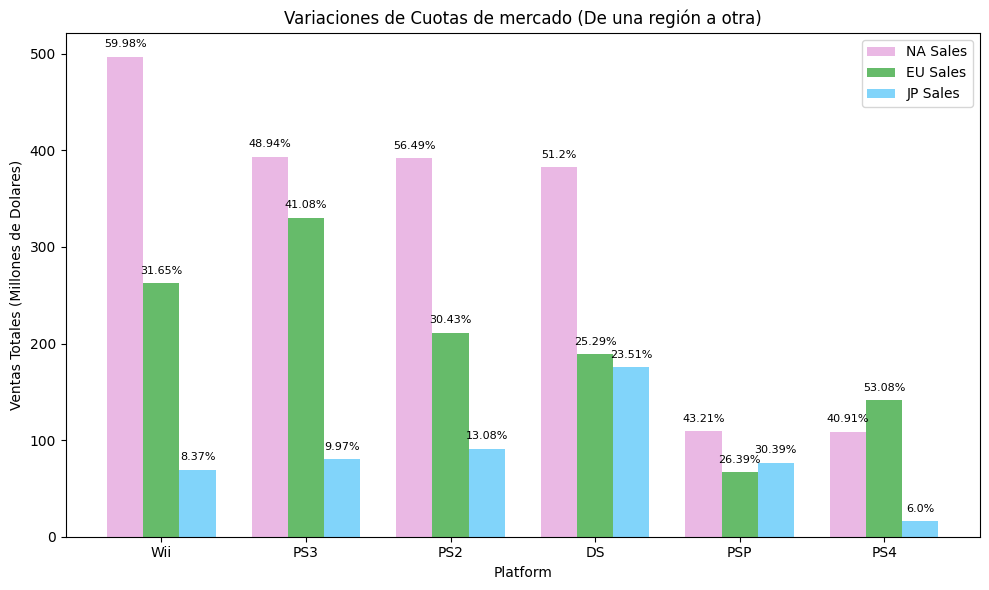

In [70]:
# Configurar el gráfico

plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(merge_na_eu_jp['platform']))

# Crear las barras para cada región
plt.bar(x, merge_na_eu_jp['na_sales'], width=bar_width, label='NA Sales', color='#EAB8E4', align='center')
plt.bar([p + bar_width for p in x], merge_na_eu_jp['eu_sales'], width=bar_width, label='EU Sales', color='#66BB6A', align='center')
plt.bar([p + bar_width * 2 for p in x], merge_na_eu_jp['jp_sales'], width=bar_width, label='JP Sales', color='#81D4FA', align='center')

# Añadir etiquetas y título
plt.xlabel('Platform')
plt.title('Variaciones de Cuotas de mercado (De una región a otra)')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.xticks([p + bar_width for p in x], merge_na_eu_jp['platform'])


# Añadir los porcentajes como etiquetas en el eje x
for i in range(len(merge_na_eu_jp)):
    plt.text(i, merge_na_eu_jp['na_sales'][i] + 10, f"{merge_na_eu_jp['quota_NA'][i]}%", ha='center', color='black', fontsize=8)
    plt.text(i + bar_width, merge_na_eu_jp['eu_sales'][i] + 10, f"{merge_na_eu_jp['quota_EU'][i]}%", ha='center', color='black',fontsize=8)
    plt.text(i + bar_width * 2, merge_na_eu_jp['jp_sales'][i] + 10, f"{merge_na_eu_jp['quota_JP'][i]}%", ha='center', color='black',fontsize=8)

plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:** El gráfico muestra de manera clara las diferencias en las preferencias de los consumidores. Podemos obsevar como la región de norte america, presenta mayores cuotas, esto podria deberse a que el mercado de consumidores es mucho más grande, o con mayor poder adquisitivo. Las preferencias de los consumidores varían significativamente entre las regiones, por ejemplo mienstras en norte america se populariza la plataforma Wii, en japon sucede lo contrario, en japon la mayor tendencia se encuentra en la plataforma DS.

Plataformas que comparten tendencias similares en sus cuotas, se encuentran: **PS3 (En Norte America y en Europa)**. Lo mismo sucede con **las plataformas DS en Europa y Japon**, comparten tendencias similares en sus cuotas.


#### 5.3 Los cinco géneros principales. Explica la diferencia.

In [71]:
# Agrupar por genero

platform_na_genre = platform_modern_sales.groupby('genre', as_index=False)['na_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_na_genre = platform_na_genre.sort_values(by='na_sales', ascending=False).reset_index(drop=True)

# Diez generos principales con mas ventas

platform_na_genre = platform_na_genre.nlargest(10,'na_sales').reset_index(drop=True)

display(platform_na_genre)



,genre,na_sales
0,Action,672.70
1,Sports,515.37
2,Shooter,454.84
3,Misc,347.38
4,Role-Playing,247.98
5,Racing,215.91
6,Platform,202.40
7,Simulation,146.27
8,Fighting,130.74
9,Adventure,76.22


In [72]:
# Calcular la varianza para la region de NA
varianza_na = platform_na_genre['na_sales'].var()

# Calcular la desviación estándar para la region de NA
desviacion_estandar_na = platform_na_genre['na_sales'].std()

print(f'Varianza en la Región NA: {varianza_na.round(2)}')
print(f'Desviación Estándar en la Región NA: {desviacion_estandar_na.round(2)}')

Varianza en la Región NA: 37018.06
Desviación Estándar en la Región NA: 192.4


In [73]:
# Agrupar por genero

platform_eu_genre = platform_modern_sales.groupby('genre', as_index=False)['eu_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_eu_genre = platform_eu_genre.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)

# Diez generos principales con mas ventas

platform_eu_genre = platform_eu_genre.nlargest(10,'eu_sales').reset_index(drop=True)

display(platform_eu_genre)


,genre,eu_sales
0,Action,417.62
1,Sports,301.87
2,Shooter,272.19
3,Misc,186.13
4,Racing,160.76
5,Role-Playing,138.42
6,Platform,112.40
7,Simulation,96.22
8,Fighting,58.32
9,Adventure,42.97


In [74]:
# Calcular la varianza para la region de EU
varianza_eu = platform_eu_genre['eu_sales'].var()

# Calcular la desviación estándar para la region de EU
desviacion_estandar_eu = platform_eu_genre['eu_sales'].std()

print(f'Varianza en la Región EU: {varianza_eu.round(2)}')
print(f'Desviación Estándar en la Región EU: {desviacion_estandar_eu.round(2)}')

Varianza en la Región EU: 14122.9
Desviación Estándar en la Región EU: 118.84


In [75]:
# Agrupar por genero

platform_jp_genre = platform_modern_sales.groupby('genre', as_index=False)['jp_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_jp_genre = platform_jp_genre.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)

# Diez generos principales con mas ventas

platform_jp_genre = platform_jp_genre.nlargest(10,'jp_sales').reset_index(drop=True)

display(platform_jp_genre)


,genre,jp_sales
0,Role-Playing,204.74
1,Action,118.69
2,Misc,79.59
3,Sports,61.54
4,Platform,44.77
5,Fighting,36.17
6,Simulation,34.53
7,Adventure,31.99
8,Puzzle,22.96
9,Racing,22.47


In [76]:
# Calcular la varianza para la region de JP
varianza_jp = platform_jp_genre['jp_sales'].var()

# Calcular la desviación estándar para la region de NA
desviacion_estandar_jp = platform_jp_genre['jp_sales'].std()

print(f'Varianza en la Región JP: {varianza_jp.round(2)}')
print(f'Desviación Estándar en la Región JP: {desviacion_estandar_jp.round(2)}')

Varianza en la Región JP: 3273.76
Desviación Estándar en la Región JP: 57.22


**Comentario:** De igual manera que hicimos para  comparar cuotas entre regiones, realizamos merge tipo inner para los géneros, para tener en una sola tabla integrada de aquellos géneros que generan ventas en las 3 regiones, y poder describir diferencias entre ellas, y estudiar como se comparta cada una.

In [77]:
merge_genre_ne = pd.merge(platform_na_genre,platform_eu_genre, on='genre', how='inner')

merge_genre_nej = pd.merge(merge_genre_ne,platform_jp_genre, on='genre', how='inner')

# Cinco generos principales con mas ventas

display(merge_genre_nej.head(n=5))


,genre,na_sales,eu_sales,jp_sales
0,Action,672.70,417.62,118.69
1,Sports,515.37,301.87,61.54
2,Misc,347.38,186.13,79.59
3,Role-Playing,247.98,138.42,204.74
4,Racing,215.91,160.76,22.47


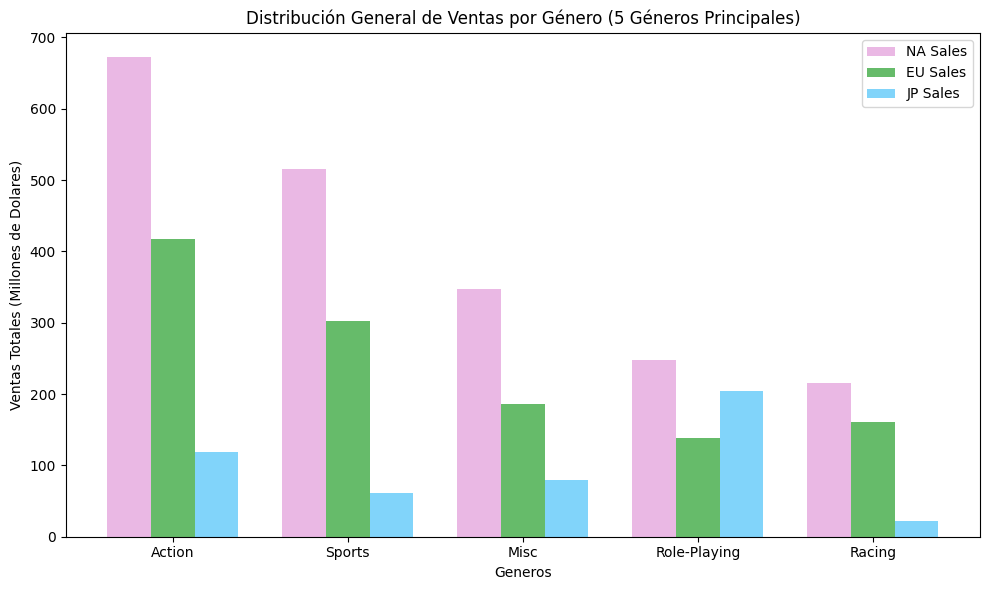

In [78]:
# Configurar el gráfico

top_genres = merge_genre_nej.head(5)

plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(top_genres['genre']))

# Crear las barras para cada región
plt.bar(x, top_genres['na_sales'], width=bar_width, label='NA Sales', color='#EAB8E4', align='center')
plt.bar([p + bar_width for p in x], top_genres['eu_sales'], width=bar_width, label='EU Sales', color='#66BB6A', align='center')
plt.bar([p + bar_width * 2 for p in x], top_genres['jp_sales'], width=bar_width, label='JP Sales', color='#81D4FA', align='center')

# Añadir etiquetas y título
plt.xlabel('Generos')
plt.title('Distribución General de Ventas por Género (5 Géneros Principales)')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.xticks([p + bar_width for p in x], top_genres['genre'])

plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:** Podemos obsevar que los géneros dominantes son: **Action**, **Sports**, aunque podemos ver que tienen diferentes niveles de intensidad en cada  región y aunque existe una tendencia global hacia ciertos géneros, las preferencias de los jugadores varían según la región.

**Comentario sobre la Varianza y Desviación Estándar en las Regiones**

1. Sobre la Varianza

    Región NA: 37018.06
    La varianza alta sugiere que las ventas en la región de América del Norte (NA) tienen una gran variabilidad, es decir, los valores están muy dispersos en comparación con la media.

    Región EU: 14122.9
    Aunque también es relativamente alta, la varianza en Europa (EU) es significativamente menor que en NA. Esto sugiere que las ventas son más consistentes, aunque todavía hay una cantidad considerable de variabilidad.

    Región JP: 3273.76
    La varianza más baja en Japón (JP) indica que las ventas son mucho más consistentes y están más agrupadas alrededor de la media en comparación con las otras regiones.

2. Sobre la Desviación Estándar

    Región NA: 192.4
    La desviación estándar alta también refuerza la idea de que las ventas en NA son muy variables. Esto significa que, en promedio, las ventas difieren bastante de la media.

    Región EU: 118.84
    La desviación estándar en EU, aunque menor que en NA, aún indica una variabilidad considerable en las ventas.

    Región JP: 57.22
    La desviación estándar más baja en JP sugiere que las ventas son más predecibles y hay menos riesgo asociado con la variabilidad en las ventas.

Mayor variabilidad en NA: Esto podría indicar que el mercado es más diverso, con una amplia gama de juegos que tienen un rendimiento muy variable en términos de ventas. 

Menor variabilidad en JP y EU: Esto puede sugerir que los consumidores en estas regiones tienden a comprar productos más similares, lo que resulta en un rendimiento de ventas más uniforme.

#### 5.4 Las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [79]:
# Agrupar por rating

platform_na_rating = platform_modern_sales.groupby('rating', as_index=False)['na_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_na_rating = platform_na_rating.sort_values(by='na_sales', ascending=False).reset_index(drop=True)

# Diez generos principales con mas ventas

platform_na_rating = platform_na_rating.nlargest(10,'na_sales').reset_index(drop=True)

display(platform_na_rating)

,rating,na_sales
0,E,1063.15
1,M,674.97
2,T,603.06
3,RP,406.27
4,E10+,353.32
5,EC,1.53
6,AO,1.26


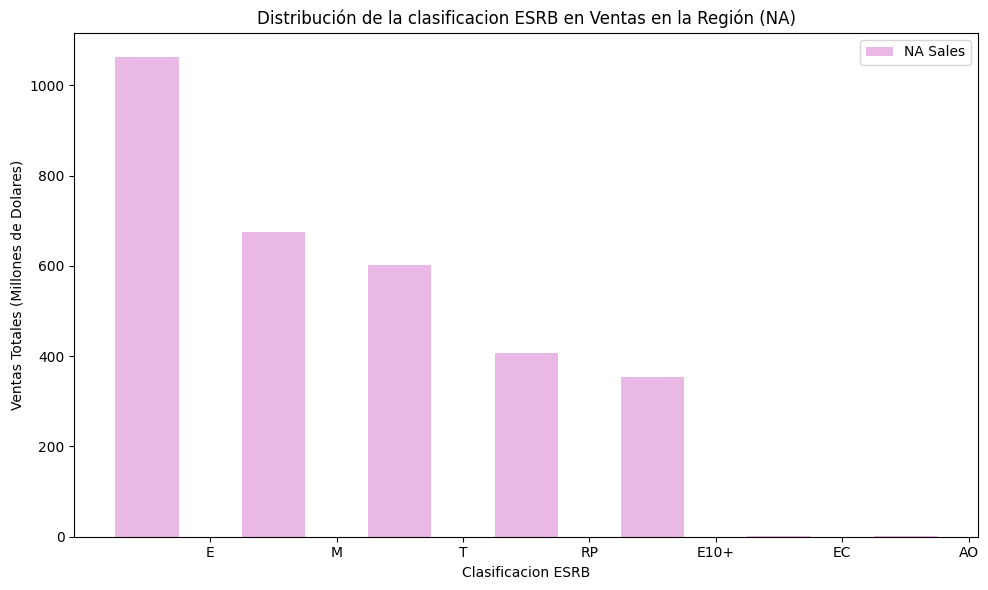

In [80]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.5
x = range(len(platform_na_rating['rating']))

# Crear barras para la región de norte america 
plt.bar(x, platform_na_rating['na_sales'], width=bar_width, label='NA Sales', color='#EAB8E4', align='center')

# Añadir etiquetas y título
plt.xlabel('Clasificacion ESRB')
plt.title('Distribución de la clasificacion ESRB en Ventas en la Región (NA)')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.xticks([p + bar_width for p in x], platform_na_rating['rating'])

plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:** Este  gráfico  sugiere, que los juegos clasificados como E son los más populares en términos de ventas en Norte américa, posiblemente porque están dirigidos a un público más amplio y accesible para todas las edades. En cambio, las clasificaciones que restringen a una audiencia mayor (como M y T) tienen un impacto en la reducción de ventas, aunque siguen siendo considerables. 

In [81]:
# Agrupar por rating

platform_eu_rating = platform_modern_sales.groupby('rating', as_index=False)['eu_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_eu_rating = platform_eu_rating.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)

# Diez generos principales con mas ventas

platform_eu_rating = platform_eu_rating.nlargest(10,'eu_sales').reset_index(drop=True)

display(platform_eu_rating)

,rating,eu_sales
0,E,593.87
1,M,442.83
2,T,330.25
3,RP,296.47
4,E10+,188.50
5,AO,0.61
6,EC,0.11


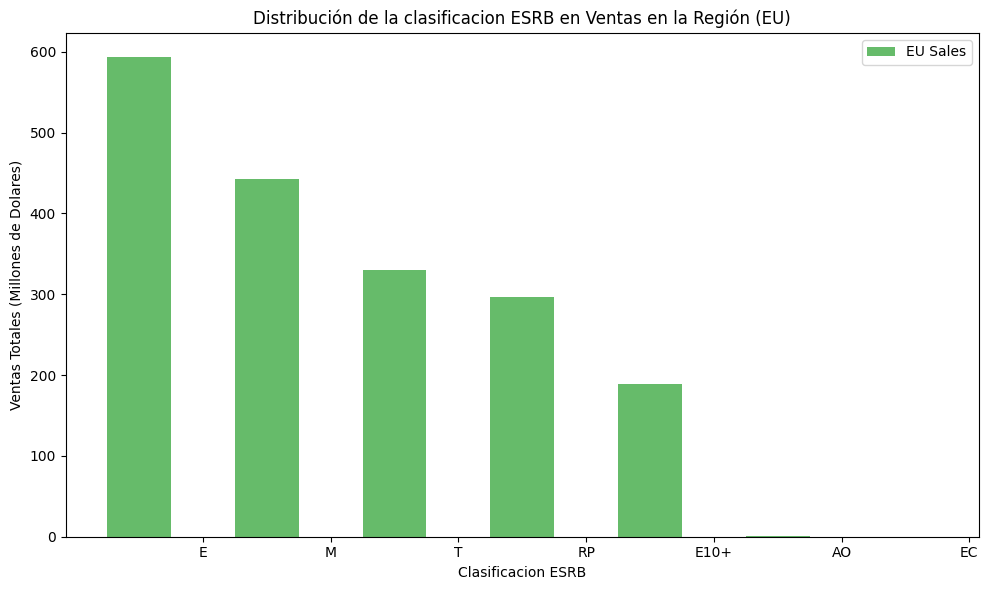

In [82]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.5
x = range(len(platform_eu_rating['rating']))

# Crear barras para la región de norte america 
plt.bar(x, platform_eu_rating['eu_sales'], width=bar_width, label='EU Sales', color='#66BB6A', align='center')

# Añadir etiquetas y título
plt.xlabel('Clasificacion ESRB')
plt.title('Distribución de la clasificacion ESRB en Ventas en la Región (EU)')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.xticks([p + bar_width for p in x], platform_eu_rating['rating'])

plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:** Este  gráfico  sugiere, que los juegos clasificados como E son los más populares en términos de ventas en Europa, posiblemente porque están dirigidos a un público más amplio y accesible para todas las edades. En cambio, las clasificaciones que restringen a una audiencia mayor (como M y T) tienen un impacto en la reducción de ventas, aunque siguen siendo considerables. 

In [83]:
# Agrupar por rating

platform_jp_rating = platform_modern_sales.groupby('rating', as_index=False)['jp_sales'].sum()

# Ordenar las ventas de mayor a menor

platform_jp_rating = platform_jp_rating.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)

# Diez generos principales con mas ventas

platform_jp_rating = platform_jp_rating.nlargest(10,'jp_sales').reset_index(drop=True)

display(platform_jp_rating)

,rating,jp_sales
0,RP,332.21
1,E,166.33
2,T,107.85
3,M,51.54
4,E10+,40.20
5,AO,0.00
6,EC,0.00


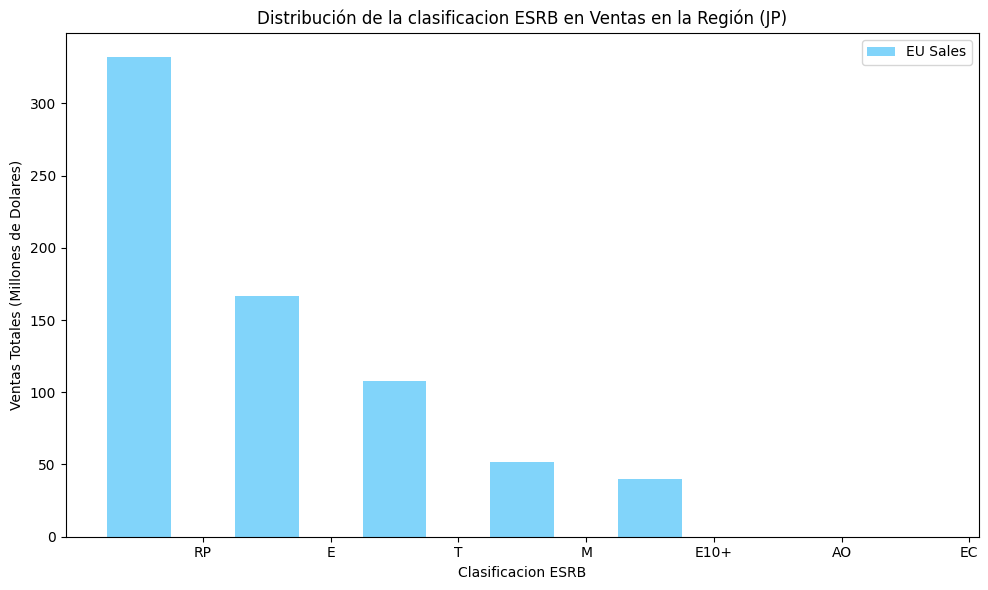

In [84]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.5
x = range(len(platform_jp_rating['rating']))

# Crear barras para la región de norte america 
plt.bar(x, platform_jp_rating['jp_sales'], width=bar_width, label='EU Sales', color='#81D4FA', align='center')

# Añadir etiquetas y título
plt.xlabel('Clasificacion ESRB')
plt.title('Distribución de la clasificacion ESRB en Ventas en la Región (JP)')
plt.ylabel('Ventas Totales (Millones de Dolares)')
plt.xticks([p + bar_width for p in x], platform_jp_rating['rating'])

plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:** Este  gráfico  sugiere, que los juegos clasificados como E son los más populares en términos de ventas en Japon, posiblemente porque están dirigidos a un público más amplio y accesible para todas las edades. En cambio, las clasificaciones que restringen a una audiencia mayor (como M y T) tienen un impacto en la reducción de ventas, aunque siguen siendo considerables. 

#### **Comentarios:** Dado que los 3 gráficos observamos un patrón similar. Podemos entonces, que es razonable que la clasificación ESRB sí afecte a las ventas de manera individual y a nivel global tambien.

# 6. Prueba las siguientes hipótesis

#### 6.1 ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.?

<div class="alert alert-block alert-info">
<b>Hipótesis</b>
<b>Nula (H₀): Las calificaciones promedio de los usuarios para XOne y PC son iguales.
Alternativa (H₁): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes. Nivel de significancia: α = 0.05</b> <a class="tocSkip"></a>
</div>


In [87]:

# Tomamos nuestro DataFrame de plataformas modernas y filtramos para XOne y PC
filtrado_xone_pc = platform_modern_sales.loc[:, ['platform', 'user_score']]

# Filtrar únicamente para las plataformas 'XOne' y 'PC'
filtrado_xone_pc = filtrado_xone_pc[filtrado_xone_pc['platform'].isin(['XOne', 'PC'])]

# Filtramos por la plataforma 'XOne'
score_xone = filtrado_xone_pc.query('platform == "XOne"')['user_score'].reset_index(drop=True) 

# Ordenar la serie de XOne
score_xone = score_xone.sort_values()

# Filtramos por la plataforma 'PC'
score_pc = filtrado_xone_pc.query('platform == "PC"')['user_score'].reset_index(drop=True) 

# Ordenar la serie de PC
score_pc = score_pc.sort_values()

# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(score_xone, score_pc)

# Resultados
print('Estadística t:', t_statistic)
print('Valor p:', p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para XOne y PC son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para 'XOne' y 'PC' son diferentes.")

Estadística t: -3.0642847055257363
Valor p: 0.0022332531147941366
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para XOne y PC son iguales.


**Comentario:**

Con estos resultados, se concluye que es estadísticamente improbable que las calificaciones promedio de usuarios para **XOne** y **PC** sean iguales.
Por lo tanto, se rechaza la hipótesis nula y se acepta la hipótesis alternativa, indicando que existe una diferencia significativa entre las calificaciones promedio para XOne y PC, con un nivel de confianza del 95%.

#### 6.2 ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes? <a id='as23'></a>

<div class="alert alert-block alert-info">
<b>Hipótesis</b>
<b>Nula (H₀): Las calificaciones promedio de los usuarios para Action y Sports son iguales.
Alternativa (H₁): Las calificaciones promedio de los usuarios para Action y Sports son diferentes. Nivel de significancia: α = 0.05</b> <a class="tocSkip"></a>
</div>

In [88]:
# Tomamos nuestro Dataframe de filtrado con nuestras plataformas modernas, y realizamos filtro de los géneros Action y Sports

filtrado_as = platform_modern_sales.loc[:,['genre','user_score']]

# Filtrar unicamente para los generos Action y Sports

filtrado_as = filtrado_as[filtrado_as['genre'].isin(['Action', 'Sports'])]

# Filtramos por la plataforma Action 

score_action = filtrado_as.query('genre == "Action"')['user_score'].reset_index(drop=True) 

# Ordenar serie de Action

score_action = score_action.sort_values()

# Filtramos por el Sports

score_sports = filtrado_as.query('genre == "Sports"')['user_score'].reset_index(drop=True) 

# Ordenar serie de Sports

score_sports = score_sports.sort_values()

# Realizar la prueba t de Student
resultado = stats.ttest_ind(score_action, score_sports)

# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(score_action, score_sports)

# Resultados
print('Estadística t:', t_statistic)
print('Valor p:', p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los géneros Action y Sports son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: las calificaciones promedio de los géneros Action y Sports son diferentes.")


Estadística t: 2.7092030080910967
Valor p: 0.0067697205413176165
Rechazamos la hipótesis nula: las calificaciones promedio de los géneros Action y Sports son iguales.


**Comentario:**

Con estos resultados, se concluye que es estadísticamente improbable que las calificaciones promedio de usuarios para **Action** y  **Sports** sean iguales. Por lo tanto, se rechaza la hipótesis nula y se acepta la hipótesis alternativa, indicando que existe una diferencia significativa entre las calificaciones promedio para action y sport, con un nivel de confianza del 95% puedo colocar eso.

# 7. Conclusiones Generales

- Los años 2008 y 2009 destacan por tener el mayor número de juegos lanzados. Ya a partir del 2011 en adelante, aunque se observa un baja de ventas, esta parece estabilizarse y mantenerse a través del tiempo.

- Las 10 plataformas que lideran, como las principales con más ventas son: PS2, X360, Wii, PS3, DS, PS, GBA, PS4, PSP y XB. Siendo las 3 plataformas lideres PS2, X360 y Wii.

- Las plataformas que anteriormente eran muy populares en ventas y ya no generan ventas, tenemos a GEN, GG, NES, NG, SCD Y SNES. También podemos responder que el tiempo que tardan en desaparecer estas plataformas es de 5 años.

- Las plataformas modernas tardan 7 años en aparecer.

- Las plataformas antiguas tardan 5 años en desaparecer.

- Las 12 plataformas líderes, tienen un crecimiento inicialmente los primeros 2 años, luego se va reduciendo a lo largo del tiempo, para cada una de las plataformas, se repite el mismo patrón para todas.

- Para nuestra plataforma PS2 (Plataforma de nuestra elección),donde evaluamos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular nos indicó una gran variabilidad en las ventas del video juego. A pesar de la dispersión, podemos observar una leve tendencia, donde se denota puntuaciones más altas, tienden a tener un rango de ventas más amplio. Sin embargo, esta tendencia no es muy marcada y existen muchas con puntuaciones altas que no tuvieron grandes ventas.

- Los videojuegos que tienden a tener ventas similares en distintas plataformas son:

    - Call of Duty: Black Ops II
    - Call of Duty: Ghosts
    - Call of Duty: Modern Wafare 2
    - Call of Duty: Modern Wafare 3
    - Grand Theft Auto V



  Estos juegos están ubicados las plataformas de PS3 y X360. Plataformas que están en el rango de las 3 principales como líderes.

- Los géneros que parecen ser más rentables encontramos a: 'Action', 'Sports' y en tercer lugar 'Shooter'. Pudimos observar claramente que son los géneros que dominan el mercado, con ventas superiores a los 800 millones de dólares.

- La región de norte america, presenta mayores cuotas, esto podria deberse a que el mercado de consumidores es mucho más grande, o con mayor poder adquisitivo. Las preferencias de los consumidores varían significativamente entre las regiones, por ejemplo mienstras en norte america se populariza la plataforma Wii, en japon sucede lo contrario, en japon la mayor tendencia se encuentra en la plataforma DS. Plataformas que comparten tendencias similares en sus cuotas, se encuentran: PS3 (En Norte America y en Europa). Lo mismo sucede con las plataformas DS en Europa y Japon, comparten tendencias similares en sus cuotas.

- Cálculo de varianza y desviación estándar en las Regiones, nos permitió ver que existe una mayor variabilidad en región NA: Esto podría indicar que el mercado es más diverso, con una amplia gama de juegos que tienen un rendimiento muy variable en términos de ventas. Menor variabilidad en JP y EU: Esto puede sugerir que los consumidores en estas regiones tienden a comprar productos más similares, lo que resulta en un rendimiento de ventas más uniforme.

- En las clasificaciones clasificación ESRB observamos que los juegos clasificados como E, son los más populares en términos de ventas en Japon, posiblemente porque están dirigidos a un público más amplio y accesible para todas las edades. En cambio, las clasificaciones que restringen a una audiencia mayor (como M y T) tienen un impacto en la reducción de ventas, aunque siguen siendo considerables.
Dado que los 3 gráficos que observamos tienen un patrón muy similar. Podemos entonces decir que es razonable que la clasificación ESRB sí afecte a las ventas de manera individual y a nivel global tambien.

- Las calificaciones promedio de los usuarios para XOne y PC son diferentes.

- Las calificaciones promedio de los géneros Action y Sports son diferentes.

